# LAB 04 (LINEAR REGRESSION IN MULTIPLE VARIABLE)

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load Dataset

In [3]:
data = pd.read_csv("housing.csv")
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake 

### Data Preprocessing
# Selecting multiple independent variables

In [4]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

# Check for missing values

In [5]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64



### Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Print model parameters

In [8]:
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2, ..., βn):", model.coef_)

Intercept (β0): -2635072.900916771
Coefficients (β1, β2, ..., βn): [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


### Make Predictions

In [9]:
y_pred = model.predict(X_test)

# Compare actual and predicted values

In [10]:
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())

        Actual     Predicted
0  1339096.077  1.308588e+06
1  1251794.179  1.237037e+06
2  1340094.966  1.243429e+06
3  1431507.623  1.228900e+06
4  1042373.524  1.063321e+06


### Evaluate the Model

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)



Model Evaluation Metrics:
Mean Squared Error (MSE): 10089009299.49946
R-squared (R²): 0.9179971706985317


### Visualize the Results

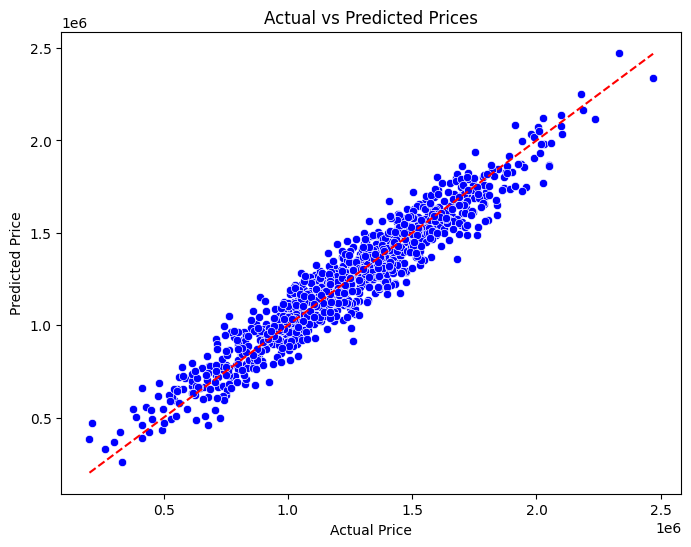

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

# Lab Questions Answers

#### 1. What does each coefficient (β1, β2, ...) indicate for this dataset?
Each coefficient represents the impact of a specific independent variable on the price. A positive coefficient means that as the variable increases, the price increases, while a negative coefficient means price decreases.

#### 2. How well does the model predict Price based on R²?
The R² value shows how much of the price variation is explained by the independent variables. A value close to 1 indicates a good fit, while a lower value means the model does not explain the price variations well.

#### 3. Are there any patterns in the residuals that violate regression assumptions?
Residual plots should be checked to identify patterns. If residuals show a trend, it suggests non-linearity. If variance increases or decreases, it violates homoscedasticity. If residuals are not normally distributed, it violates the normality assumption.
